# Factor Analysis

### *PCA model*:

$$ Z = XW, $$

where $ Z $ - principal component, $ X $ - original data, $ W $ - weight matrix (eigenvectors of the covariance matrix)

Fundamentally:

$$ X_i = a_{i1}PC_1 + a_{i2}PC_2 + \dots + a_{ip}PC_p ;$$

Considers *total variance* in the data. Components are uncorrelated by construction.

Roughly speaking, we want to save as much information as we can, while reducing the dimensionality.

### *FA model*:

$$ X = LF + ϵ,$$

where $ X $ - observed variables, $ L $ - factor loadings matrix, $ F $ - latent factors, $ ϵ $ - unique factors.

Similarly to PCA, we also reducing the number of variables while retaining as much information as possible, but despite that, our approach is a bit different from what PCA does.

We want to explain correlation with some latent factors (which then can be interpreted analytically) by decomposing the variance of each variable into common variance (explained by factors) and unique variance (specific variance + error).

Fundamental equation would look like:

$$ X_i = \lambda_{i1} F_1 + \lambda_{i2} F_2 + \dots + \lambda_{in}F_n + ϵ_i$$

where $ X_i $ is $i$-th observation, $\lambda_{in}$ - loading of the $i$-th variable on the $n$-th factor, $ F_j $ - common factor , $ ϵ_i $ - unique factor.

*Key assumptions* here:

1. Common factors $ F $ have mean zero and unit variance
2. Unique factors $ϵ$ is uncorrelated with common factors $F$
3. $ X_i $ is standardized

Total $Var$ of each $X$ can be partitioned into two variances as:

$$ Var(X_i) =  \sum_{j=1}^m \underbrace{\lambda_{ij}^2}_\text{common} + \underbrace{Var(\epsilon)}_\text{unique}$$

since $ X_i $ is standardized $→ Var(X_i) = 1$

$$ 1 = \sum_{j=1}^m \lambda_{ij}^2 + Var(\epsilon) $$

from here we may obtain *communality ($h_i^2)$* variable, which represents portion of variance explained by the common factors as:

$$ h^2_i = \sum_{j=1}^m  \lambda_{ij}^2$$

from what we get *uniqueness* as:

$$ u = 1 - h^2_i;$$


Let's breakdown algorithm step-by-step:

1. We need to standardize the data:

$$ Z = \frac{X - \overline{X}}{\sigma} $$

2. Second step is to calculate covariance matrix:

$$ \Sigma = Cov(X) = LL^T + E $$

3. Get eigenvalues with the corresponding eigenvectors of $ \Sigma $ via eigendecomposition:

$$ \Sigma = QDQ^T $$  

SVD and other methods are appropriate.

4. Decide on the number of factors

5. Extract initial factor loadings as:

$$ L = VD^{1/2}, $$

where L - loadings, V - eigenvectors, D - diagonal matrix of square roots of eigenvalues

i.e.

$$ L_1 = v_1 \times \sqrt{d_1}$$

6. Optional. Rotation (i.e. varimax) for better interpretation

7. Get factor scores as:

$$ S = W^T Z ,$$

where $W$ is a weight matrix derived from the $L$ and $Z$ is a standardized data.

8. Interpret the factors (If you can :D)

9. Compute variances




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/wolfs_dogs.txt', sep='\t', header=None)

print(df.head(6))

     0   1   2     3     4     5
0  129  64  95  17.5  11.2  13.8
1  154  74  76  20.0  14.2  16.5
2  170  87  71  17.9  12.3  15.9
3  188  94  73  19.5  13.3  14.8
4  161  81  55  17.1  12.1  13.0
5  164  90  58  17.5  12.7  14.7


let's add names to our columns

In [6]:
df = df.rename(columns={0: "Jaw length (mm)", 1: "Jaw width (mm)", 2: "Jaw depth (mm)", 3: "Tooth size (cm)", 4: "Mandible angle (cm)", 5: "Weight (kg)"})

In [7]:
df.head(6)


,Jaw length (mm),Jaw width (mm),Jaw depth (mm),Tooth size (cm),Mandible angle (cm),Weight (kg)
0,129,64,95,17.5,11.2,13.8
1,154,74,76,20.0,14.2,16.5
2,170,87,71,17.9,12.3,15.9
3,188,94,73,19.5,13.3,14.8
4,161,81,55,17.1,12.1,13.0
5,164,90,58,17.5,12.7,14.7


we actually can skip standardization step, because we'll use correlation matrix, which is already normalized

In [8]:
normalized_df = (df - df.mean()) / df.std()

now let's see correlation coefficients:

,Jaw length (mm),Jaw width (mm),Jaw depth (mm),Tooth size (cm),Mandible angle (cm),Weight (kg)
Jaw length (mm),1.000000,0.958741,0.348183,0.612949,0.717936,0.587251
Jaw width (mm),0.958741,1.000000,0.200333,0.661002,0.735956,0.594653
Jaw depth (mm),0.348183,0.200333,1.000000,0.369962,0.350280,0.354777
Tooth size (cm),0.612949,0.661002,0.369962,1.000000,0.893512,0.762643
Mandible angle (cm),0.717936,0.735956,0.350280,0.893512,1.000000,0.789216
Weight (kg),0.587251,0.594653,0.354777,0.762643,0.789216,1.000000


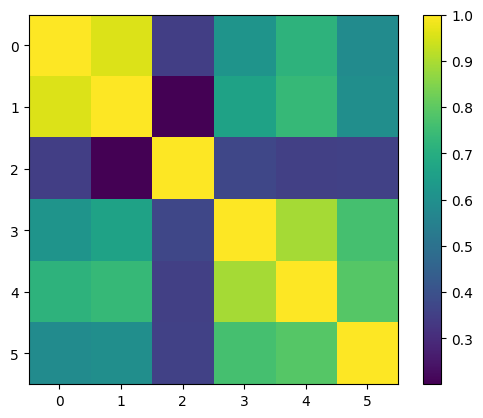

In [9]:
corr = df.corr()
plt.imshow(corr)
plt.colorbar()
corr.head(6)

We can observe high correlations between the data, however, let's just stick with top four:

 `jaw width` and `jaw length` ~ 0.96 ,

 `tooth size` and `mandible angle` ~ 0.89 ,

 `Weight` and `mandible angle` ~ 0.79 ,

 `Weight` and `tooth size` ~ 0.76





but the most interesting one is `jaw depth`, because it shows lower correlations with other variables.

i.e. now we have 2 groups:

1. all variables except `jaw depth`
2. `jaw depth`


Let's calculate eigenvalues\vectors:

In [10]:
A = corr.to_numpy()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(A)

eigenvalues

array([4.09997446, 0.88253549, 0.63880132, 0.25948309, 0.02190017,
       0.09730546])

Using Kaiser criterion we can see, that only 1 eigenvalue is >1, however, let's take 2 factors as our main reference:

In [12]:
idx = [0,1]  # idx of the eigenvalues
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# extracting the selected eigenvalues and eigenvectors
selected_eigenvalues = eigenvalues[:2]
selected_eigenvectors = eigenvectors[:, :2]

# calculating factor loadings
loadings = selected_eigenvectors * np.sqrt(selected_eigenvalues)

# creating dataframe of loadings for demonstration
variables = df.columns
loadings_df = pd.DataFrame(loadings, index=variables, columns=[f'factor {i+1}' for i in range(2)])

In [13]:
print(loadings_df)

                     factor 1  factor 2
Jaw length (mm)      0.872356  0.214611
Jaw width (mm)       0.871724  0.357341
Jaw depth (mm)       0.461940 -0.834450
Tooth size (cm)      0.888951 -0.061999
Mandible angle (cm)  0.931568  0.019602
Weight (kg)          0.841204 -0.090824


We wont use the rotation function here, because the result are pretty interpretable already:

Group 1 relies on the `factor 1`, and group 2 loads negatively on `factor 2`.

So, we can conclude that `factor 1` could represent some general growth factor affecting the size of the jaw and related features

`factor 2` might indicate on some functional adaptation

Now, we can calculate communalities and uniquenesses:

In [15]:
x = np.array([3, 12, 2]) # just funny how argsort works
_ = np.argsort(x) # this code is not needed for FA
_ # output is a list of indeces that will sort our array

array([2, 0, 1])

In [16]:
x[_] # you see? funny

array([ 2,  3, 12])

communalities $ → h^2 = \sum_{i} \lambda^2_i $

In [17]:
communalities = np.sum(loadings**2, axis=1)
uniquenesses = 1 - communalities

In [18]:
communalities

array([0.80706369, 0.88759545, 0.90969624, 0.79407828, 0.86820232,
       0.71587397])

In [19]:
uniquenesses

array([0.19293631, 0.11240455, 0.09030376, 0.20592172, 0.13179768,
       0.28412603])

 In the end we get an unclear pictore, additionally we see that there are a lot of common variance, so from what I can conclude, this data is not suitable for FA...

## Library approach

In [1]:
!pip install factor_analyzer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from factor_analyzer import FactorAnalyzer

In [20]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(corr)
kmo_model # show's whether it is suitable to use FA (>0.5 is suitable)

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.47662244383453994

`kmo` value is another point to the team "FA is not suitable here" score

In [43]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues


array([4.09997446, 0.88253549, 0.63880132, 0.25948309, 0.02190017,
       0.09730546])

In [55]:
fa = FactorAnalyzer(n_factors=2, rotation=None, is_corr_matrix=True)
fa.fit(corr)

eigenvalues, vectors = fa.get_eigenvalues()

print(eigenvalues)

loadings = fa.loadings_
loading_df = pd.DataFrame(loadings, index=variables, columns=['factor 1', 'factor 2'])

loading_df


[4.09997446 0.88253549 0.63880132 0.25948309 0.09730546 0.02190017]


,factor 1,factor 2
Jaw length (mm),0.874799,-0.392492
Jaw width (mm),0.894137,-0.445583
Jaw depth (mm),0.372375,0.142386
Tooth size (cm),0.874113,0.320839
Mandible angle (cm),0.927235,0.221516
Weight (kg),0.789865,0.256874


Results are different from what we've got! But no worries, It is because `factor_analyzer` lib uses the MinRes method by default insted of PCA.

Let's quickly adjust numpy code so that our results will be approximately as from FA lib:

In [88]:
# initial communality (using SMC)
init_comm = 1 - 1 / np.diag(np.linalg.inv(corr))
A = df.corr().to_numpy() # reassigning

for iteration in range(100):
    # eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # extract n_factors
    n_factors = 2
    selected_eigenvalues = eigenvalues[:n_factors]
    selected_eigenvectors = eigenvectors[:, :n_factors]

    # factor loadings
    loadings = selected_eigenvectors * np.sqrt(selected_eigenvalues)

    # recalculating communalities
    new_comm = np.sum(loadings ** 2, axis=1)

    # confergence if
    if np.allclose(new_comm, init_comm, atol=1e-6):
        break

    # updating communalities
    init_comm = new_comm
    np.fill_diagonal(A, init_comm)

print("final communalities:\n", init_comm)
print("factor loadings:\n", loadings)

final communalities:
 [0.74240064 1.36876354 0.17120498 0.843364   0.91250787 0.69168572]
factor loadings:
 [[-0.8350861  -0.2122071 ]
 [-0.98226189 -0.63555103]
 [-0.36744716  0.19023031]
 [-0.86108977  0.31919963]
 [-0.91995979  0.25725835]
 [-0.78271222  0.28115353]]
